In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from sql_funcs import lite_to_pandas, pandas_to_lite

In [3]:
%matplotlib widget
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['font.size'] = 14

# 3.1

In [5]:
sql = f"""
select 
name,
count(*) as trades
from client as l
left join trade as r on l.id = r.client_id 
group by 1
order by 1 asc
"""

df = lite_to_pandas(sql)

display(df.head())

SQL fetched a df(3, 2)


,NAME,trades
0,Aatami,2
1,Beetami,1
2,Ceetami,3


# 3.2

In [9]:
sql = f"""
select 
trade_id,
name
from trade_tag
where name != 'Trader'
"""

df = lite_to_pandas(sql)

display(df.head(20))

SQL fetched a df(3, 2)


,TRADE_ID,NAME
0,1,Hedging
1,2,Hedging
2,3,Hedging


# 3.3

In [11]:
sql = f"""
select 
value as name,
sum(notional) as total_sum
from trade_tag
left join trade using(trade_id)
where value = 'Nick Leeson'
"""

df = lite_to_pandas(sql)

display(df.head(20))

SQL fetched a df(1, 2)


,name,total_sum
0,Nick Leeson,500700000


8:42

# 2.1

In [17]:
exp = 'babbabb'

def even_a_tester(exp):
    if len(re.findall("a", exp)) % 2 == 0:
        return True
    else:
        return False
    
even_a_tester(exp)

True

# 2.2

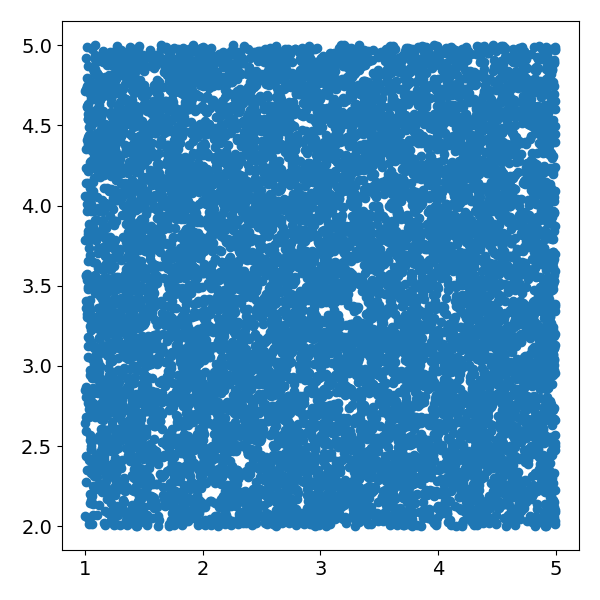

In [4]:
# a)

def random_square(a, b, sample):
    assert b[0] > a[0]
    assert b[1] > a[1]
    x = np.random.uniform(a[0], b[0], sample)
    y = np.random.uniform(a[1], b[1], sample)
    return x, y

a = [1, 2]
b = [5, 5]
x, y = random_square(a, b, 10000)

plt.figure(1)
plt.clf()
plt.scatter(x, y)
plt.tight_layout()
plt.show()

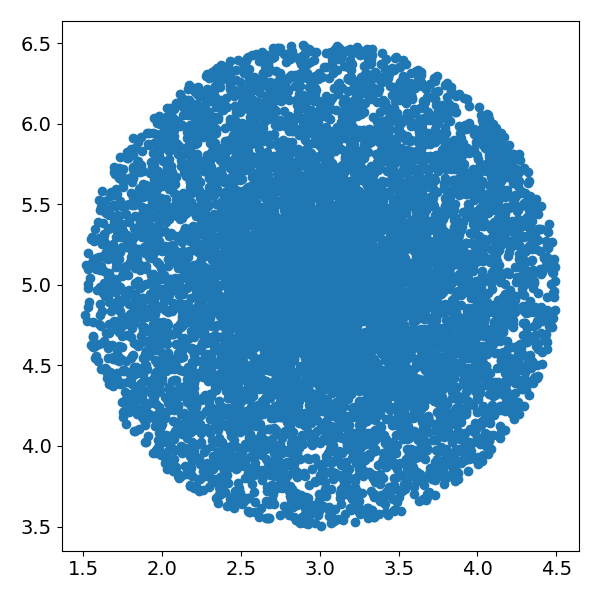

In [7]:
# b)

def random_circle(a, r, sample):

    x = a[0]
    y = a[1]
    r = r

    # [0, 2pi] rotation
    alpha = 2 * np.pi * np.random.uniform(0, 1, sample)

    # [0, r] radius 
    r = np.random.uniform(0, r, sample)

    # calculating coordinates
    x = x + r * np.cos(alpha)
    y = y + r * np.sin(alpha)

    return x, y

a = [3, 5]
r = 1.5
x, y = random_circle(a, r, 10000)

plt.figure(2)
plt.clf()
plt.scatter(x, y)
plt.tight_layout()
plt.show()

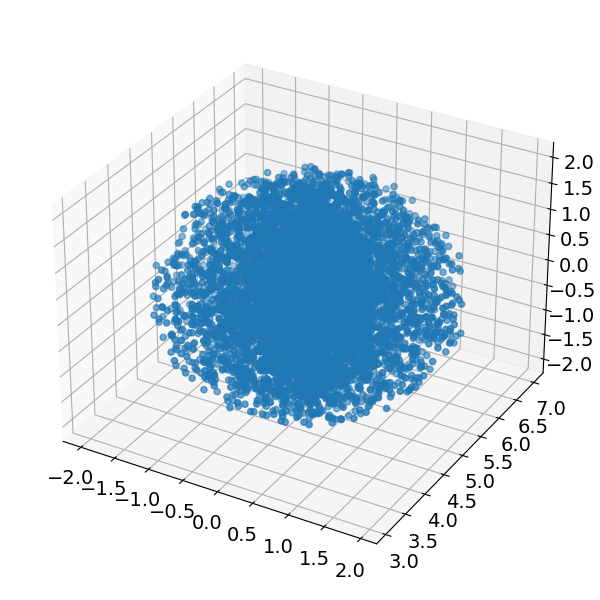

In [12]:
# c)

def random_ball(a, r, sample):

    x = a[0]
    y = a[1]
    z = a[2]
    r = r

    # [0, 2pi] rotation
    theta = 2 * np.pi * np.random.uniform(0, 1, sample)

    # [0, 1pi] rotation
    phi = 1 * np.pi * np.random.uniform(0, 1, sample)

    # [0, r] radius 
    r = np.random.uniform(0, r, sample)

    # calculating coordinates
    x = x + r * np.cos(theta) * np.sin(phi)
    y = y + r * np.sin(theta) * np.sin(phi)
    z = z + r * np.cos(phi)

    return x, y, z

a = [0, 5, 0]
r = 2
x, y, z = random_ball(a, r, 10000)

fig = plt.figure(3)
plt.clf()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
plt.tight_layout()
plt.show()

# 3.3

In [19]:
# a)

def find_max_sum(vec):
    vec = vec[vec > 0]
    return vec

test = np.array([10, 9, 5, 2, -1, -5])
find_max_sum(test)

array([10,  9,  5,  2])

In [54]:
# b)

# ei toimi...

def find_max_sum_seq(vec):
    top_val = 0
    # from left
    for i in range(len(vec)):
        val = sum(vec[0:i])
        if val > top_val: 
            top_val = val
            print(i)
            print(top_val)
    # from right
    for i in range(len(vec)):
        val = sum(vec[i:len(vec)])
        if val > top_val: 
            top_val = val
            print(i)
            print(top_val)



test = np.array([-2, 9, 5, 2, -1, -5])
find_max_sum_seq(test)

2
7
3
12
4
14


# 4.

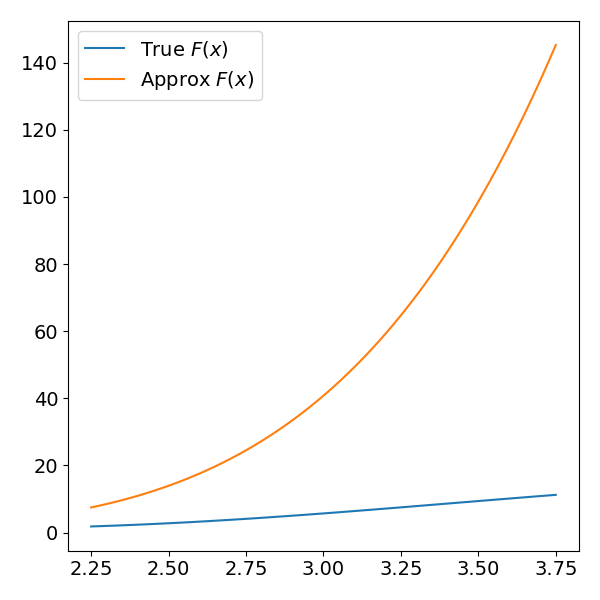

In [53]:
def fx_approx(x):
    def taylor_sin2x(x):
        return 2*x - 8*x**3/(3*2*1) + 32*x**5/(5*4*3*2*1)
    
    approx = x**2 - x + taylor_sin2x(x)
    return approx

def fx(x):
    return x**2 - x + np.sin(2*x)



plt.figure(5)
plt.clf()

x = np.linspace(2.25, 3.75, 100)
plt.plot(x, fx(x), label='True $F(x)$')

plt.plot(x, fx_approx(x), label='Approx $F(x)$')

plt.legend()
plt.tight_layout()
plt.show()

# 6

In [44]:
class Poly():
    def __init__(self, c):
        self.c = c

    def valueAt(self, x):
        value = self.c[0]
        for i in range(1, len(self.c)):
            value += self.c[i]*x**i
        return value
    
    def derivative(self):
        der = []
        for i in range(1, len(self.c)):
            der.append(self.c[i]*i)
        return der
    
    def add_poly(self, c2):
        if len(self.c) >= len(c2):
            c12 = self.c
            for i in range(len(c2)):
                c12[i] = self.c[i] + c2[i]

        if len(self.c) < len(c2):
            c12 = c2
            for i in range(len(self.c)):
                c12[i] = self.c[i] + c2[i]

        return c12



test = [1,2,3] 
x = 2
poly = Poly(test)
val = poly.valueAt(x)
print(val)

val = poly.derivative()
print(val)

test2 = [1,2,3,4] 
val = poly.add_poly(test2)
print(val)

17
[2, 6]
[2, 4, 6, 4]


# 5

In [51]:
def my_sufle(vec):
    rng = []
    for i in range(len(vec)):
        pick = np.random.randint(0, len(vec))
        rng.append(vec[pick])
        vec.pop(pick)
    return rng


vals = [-5,-4,-3,-2,-1, 0, 1, 2, 3, 4, 5]
my_sufle(vals)

[1, -3, 5, -5, 3, 2, 4, -1, 0, -2, -4]

# 4.1

In [52]:
def finder(n):
    i = 0
    val = 0
    while True:
        if val%2 == 0:
            if val%3 == 0:
                if val%5 == 0:
                    i +=1
        
        if i >= n:
            return val
        
        val += 1


n = 5000
finder(n)


149970